# 可視化

In [1]:
using Pkg
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
  Installed ZeroMQ_jll ────── v4.3.2+5
  Installed Zlib_jll ──────── v1.2.11+18
  Installed FFTW_jll ──────── v3.3.9+6
  Installed OpenSpecFun_jll ─ v0.5.3+4
######################################################################### 100.0%
No Changes to `~/.julia/environments/v1.5/Project.toml`
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [f5851436] ↑ FFTW_jll v3.3.9+5 ⇒ v3.3.9+6
  [efe28fd5] ↑ OpenSpecFun_jll v0.5.3+3 ⇒ v0.5.3+4
  [8f1865be] ↑ ZeroMQ_jll v4.3.2+4 ⇒ v4.3.2+5
  [83775a58] ↑ Zlib_jll v1.2.11+17 ⇒ v1.2.11+18


In [2]:
Pkg.add("FixedPointNumbers")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [3]:
using PyPlot

In [4]:
using FixedPointNumbers, ColorTypes

In [5]:
#データの読み込み
loc = "/Users/satoshi/udemy_study/julia/data/"
filename = "temp_2019_tokyo.csv"

f = open(loc * filename)

#格納する配列
tt = zeros(Int64,0) # month
xx = zeros(Float64,0) #Temperature
yy = zeros(Float64,0) # 降水量

i = 0
for line in eachline(f)
    i += 1
    i == 1 && continue
    
    s = split(line, ",")
    t = parse(Int64, s[1])
    push!(tt,t)
    
    x = parse(Float64,s[2])
    push!(xx,x)

    y = parse(Float64,s[3])
    push!(yy,y)
end

println(tt)
println(xx)
println(yy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[5.6, 7.2, 10.6, 13.6, 20.0, 21.8, 24.1, 28.4, 25.1, 19.4, 13.1, 8.5]
[16.0, 42.0, 117.5, 90.5, 120.5, 225.0, 193.0, 110.0, 197.0, 529.5, 156.5, 76.5]


In [6]:
PyPlot.version

v"3.3.1"

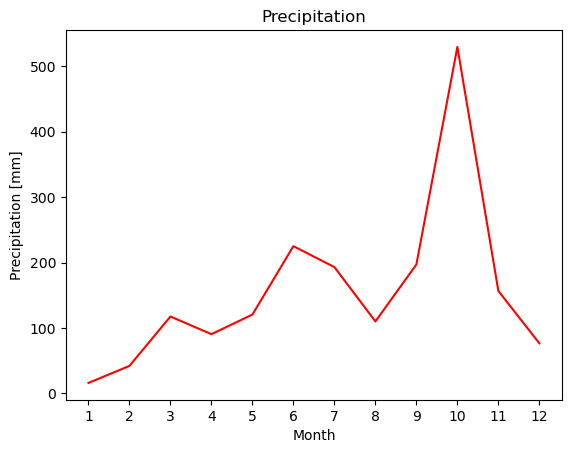

In [12]:
#折れ線
ax = PyPlot.axes()

plot(tt, yy, color=:red)
title("Precipitation")
xlabel("Month")
ylabel("Precipitation [mm]")

Mx = matplotlib.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(Mx)

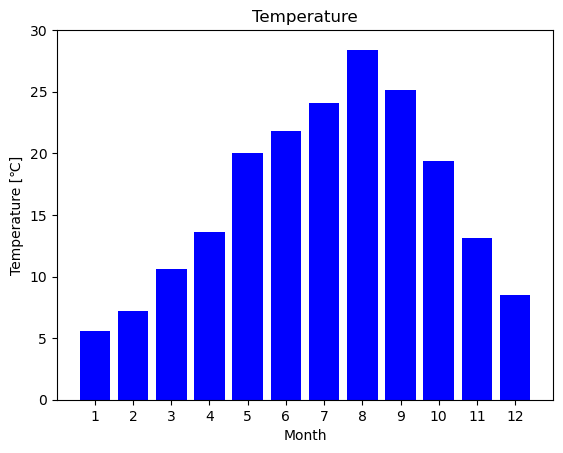

(0.0, 30.0)

In [19]:
#棒グラフ
ax = PyPlot.axes()

b = bar(tt, xx, color=:blue)

title("Temperature")
xlabel("Month")
ylabel("Temperature [℃]")

Mx = matplotlib.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(Mx)

ylim(0, 30)

#grid("on")

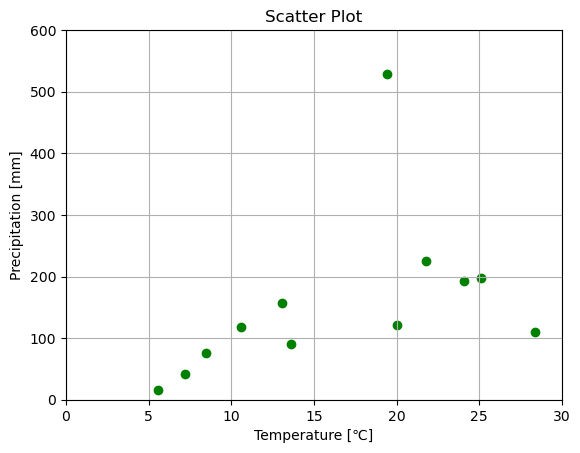

(0.0, 600.0)

In [23]:
#散布図
ax = PyPlot.axes()

scatter(xx, yy, color=:green)
title("Scatter Plot")
xlabel("Temperature [℃]")
ylabel("Precipitation [mm]")
grid("on")

xlim(0,30)
ylim(0,600)

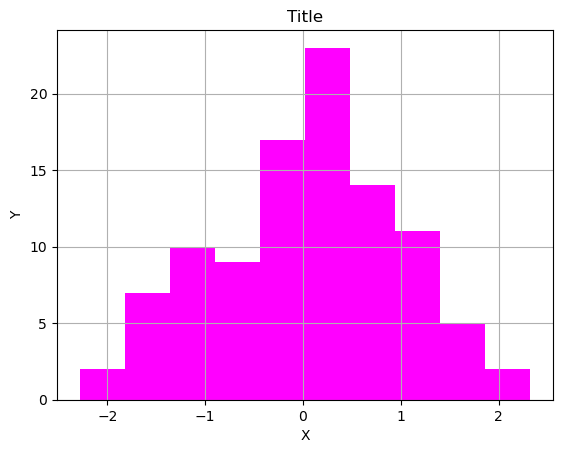

PyObject Text(0.5, 1.0, 'Title')

In [30]:
#ヒストグラム
x = randn(100)
nbins = 10

hist(x, nbins, color=:magenta)

grid("on")
xlabel("X")
ylabel("Y")
title("Title")

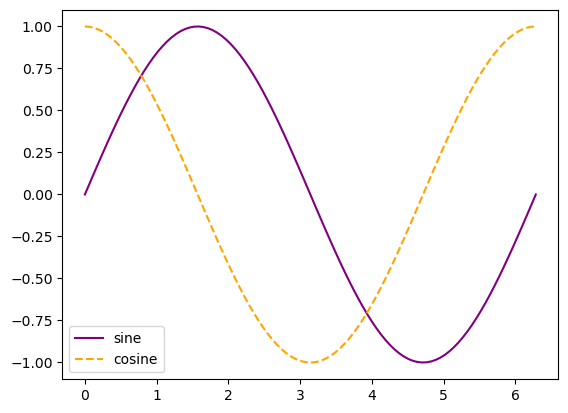

PyObject <matplotlib.legend.Legend object at 0x7fc32c1f0040>

In [33]:
#複数プロット
x = range(0,2pi,length=100)

plot(x, sin.(x),"-",label="sine",color=:purple)
plot(x, cos.(x),"--",label="cosine",color=:orange)
legend()

In [36]:
#3Dプロット
n = 30
x = range(-3,3, length=n)
y = range(-3,3, length=n)

xx = collect(x)
yy = collect(y)

z = zeros(n,n)

#z = x^2 + y^2
for i in 1:n
    for j in 1:n
        z[i,j] = xx[i]^2+yy[j]^2
    end

end

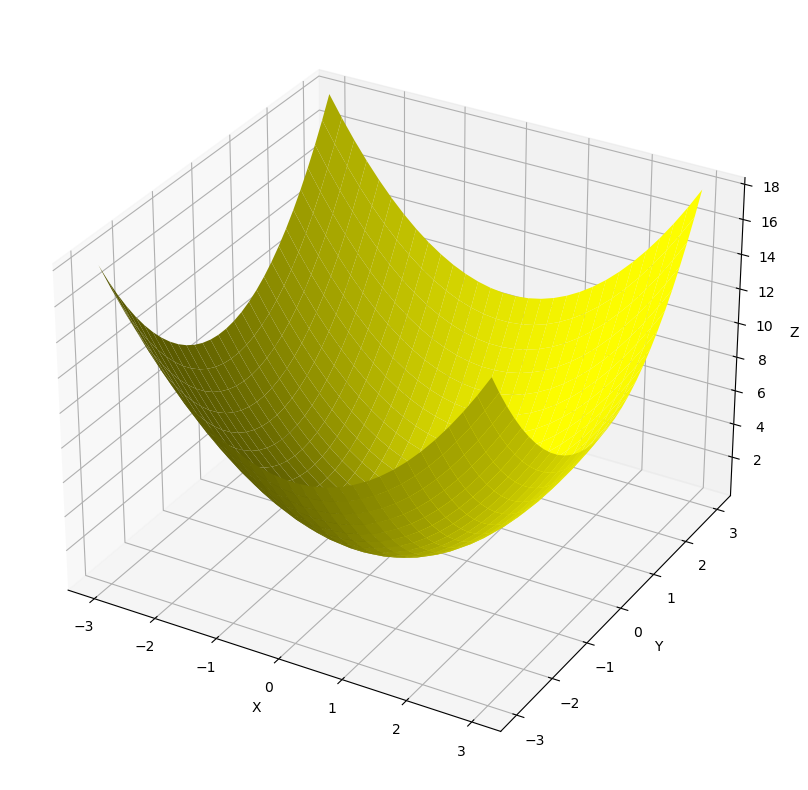

PyObject Text(0.09332506951644351, 0.012503188505254637, 'Z')

In [40]:
fig = figure("pyplot_surfaceplot",figsize=(10,10))
plot_surface(xx,yy,z,color=:yellow)
xlabel("X")
ylabel("Y")
zlabel("Z")

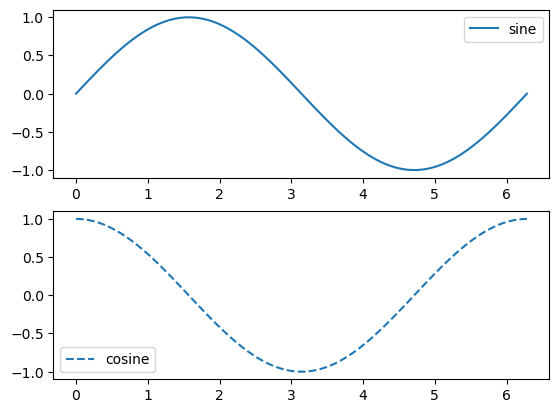

In [43]:
#複数プロット&プロットの保存
x = range(0,2pi,length=100)

subplot(2,1,1)
plot(x,sin.(x),"-",label="sine")
legend()

subplot(2,1,2)
plot(x,cos.(x),"--",label="cosine")
legend()

savefig("/Users/satoshi/udemy_study/julia/image1.png")